# Vorlesungs Blatt

In [116]:
import pandas as pd
%xmode minimal
pd.set_option("mode.copy_on_write", True)

Exception reporting mode: Minimal


In [117]:
# Wetterdaten Laden
wetter = {
    "Stunde": [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1, 2, 3, 4, 5],
    "Temperatur": [-0.3, 0.6, 1.3, 1.9, 2.3, 2.4, 3.1, 3.4, 3.5, 3.4, 3.5, 3.6, 4.0, 4.6, 4.8, 4.7, 3.3, 2.8, -0.6, -0.8, -0.7, -0.4, -0.3],
    "Taupunkt": [-2, -1, -0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, -0, -2, -2, -2, -2, -2],
    "Luftdruck": [1001, 1010, 1010, 1010, 1009, 1008, 1007, 1006, 1004, 1003, 1001, 1000, 999, 997, 997, 996, 995, 994, 1012, 1012, 1012, 1011, 1011],
    "Regen": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 4, 4, 5, 0, 0, 0, 0, 0],
    "Sonne": [0, 0, 0, 17, 28, 27, 38, 33, 13, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    "Wind_max": [12, 16, 22, 22, 33, 35, 35, 60, 44, 48, 56, 53, 50, 52, 54, 53, 95, 68, 13, 11, 9, 10, 12],
    "Windrichtung":[250, 263, 270, 272, 269, 264, 266, 264, 256, 252, 251, 252, 257,258, 266, 274, 282, 287, 261, 248, 244, 270, 277]
}
wetter = pd.DataFrame(data=wetter)
wetter.head(3)

,Stunde,Temperatur,Taupunkt,Luftdruck,Regen,Sonne,Wind_max,Windrichtung
0,6,-0.3,-2,1001,0,0,12,250
1,7,0.6,-1,1010,0,0,16,263
2,8,1.3,0,1010,0,0,22,270


In [118]:
wetter.tail()

,Stunde,Temperatur,Taupunkt,Luftdruck,Regen,Sonne,Wind_max,Windrichtung
18,1,-0.6,-2,1012,0,0,13,261
19,2,-0.8,-2,1012,0,0,11,248
20,3,-0.7,-2,1012,0,0,9,244
21,4,-0.4,-2,1011,0,0,10,270
22,5,-0.3,-2,1011,0,0,12,277


In [119]:
wetter.sample(3)

,Stunde,Temperatur,Taupunkt,Luftdruck,Regen,Sonne,Wind_max,Windrichtung
17,23,2.8,0,994,5,0,68,287
4,10,2.3,1,1009,0,28,33,269
1,7,0.6,-1,1010,0,0,16,263


## Null

In [120]:
a = 1 
type(a)

int

In [121]:
# Ist nicht pandas
b = None
type(b)

NoneType

Möglichst Pandas benutzen mit `pd.NA`

In [122]:
# Besseres Vorgehen mit Pandas
c = pd.NA
type(c)

pandas._libs.missing.NAType

In [123]:
data = {
    "test": [1, 3, 0, pd.NA, None],
    "anders": [pd.NA, 2, 6, 'hugo', 18]    
        }
df = pd.DataFrame(data)
df

,test,anders
0,1,<NA>
1,3,2
2,0,6
3,<NA>,hugo
4,None,18


In [124]:
df.loc[df["test"]==pd.NA]

,test,anders


In [125]:
df.isna()

,test,anders
0,False,True
1,False,False
2,False,False
3,True,False
4,True,False


In [126]:
df.loc[df["test"].isna()]

,test,anders
3,<NA>,hugo
4,None,18


In [127]:
pd.NA == 3

<NA>

In [128]:
pd.NA == pd.NA

<NA>

In [129]:
pd.isna(pd.NA)

True

In [130]:
1 + pd.NA

<NA>

In [131]:
1 > pd.NA

<NA>

In [132]:
pd.NA & True

<NA>

In [133]:
pd.NA | True

True

In [134]:
df = df.convert_dtypes()

In [135]:
df.dtypes

test       Int64
anders    object
dtype: object

Der Große `Int64`  kann `Nulls` der kleine `int64` kann es nicht


In [136]:
df["test"].astype('Int64')

0       1
1       3
2       0
3    <NA>
4    <NA>
Name: test, dtype: Int64

### Vergleiche mit Null solten UNKNOWN ergeben

In [137]:
if(1 != None):
    print('True')

True


In [138]:
print(pd.NA == 1)
print(pd.NA == 1)

<NA>
<NA>


In [139]:
s = pd.Series([1, 2, pd.NA])
s

0       1
1       2
2    <NA>
dtype: object

In [140]:
s == 2

0    False
1     True
2    False
dtype: bool

In [141]:
s == pd.NA

0    False
1    False
2    False
dtype: bool

In [142]:
pd.NA == 13

<NA>

In [143]:
# if(pd.NA < 13):
#     print('Kleiner')
# else:
#     print('größer')

In [144]:
df.isna()

,test,anders
0,False,True
1,False,False
2,False,False
3,True,False
4,True,False


In [145]:
df.fillna(-42)

,test,anders
0,1,-42
1,3,2
2,0,6
3,-42,hugo
4,-42,18


In [146]:
# Gefährlich kann großteil der Daten löschen
# unbedingt isna() mit counter
df.dropna(subset="test")

,test,anders
0,1,<NA>
1,3,2
2,0,6


In [147]:
# Um zu normalisieren
df = df.fillna(pd.NA)

### Interpolieren fehlernder Wert

In [148]:
wetter = pd.read_csv('./data/wetter.csv')
wetter.head(4)

,Stunde,Temperatur,Taupunkt,Luftdruck,Regen,Sonne,Windspitze,Windrichtung
0,6,-0.3,-2.0,1001,0,0,12,250
1,7,0.6,-1.0,1010,0,0,16,263
2,8,1.3,0.0,1010,0,0,22,270
3,9,1.9,0.0,1010,0,17,22,272


In [149]:
wetter = (
    wetter[["Stunde", "Temperatur"]]
    .sort_values(by=["Stunde"])
    .set_index("Stunde")
    )

In [150]:
wetter.loc[[4, 5, 6, 11], "Temperatur"] = pd.NA

In [151]:
wetter

,Temperatur
Stunde,
1,-0.6
2,-0.8
3,-0.7
4,NaN
5,NaN
6,NaN
7,0.6
8,1.3
9,1.9


<Axes: xlabel='Stunde'>

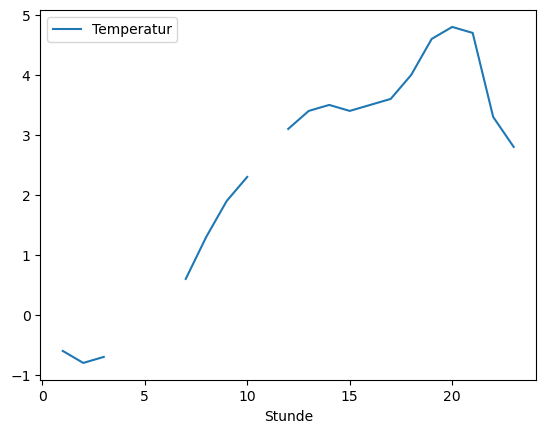

In [152]:
wetter.plot()

In [157]:
wetter_linear = wetter.interpolate() # linear Zahlen ergänzen

<Axes: xlabel='Stunde'>

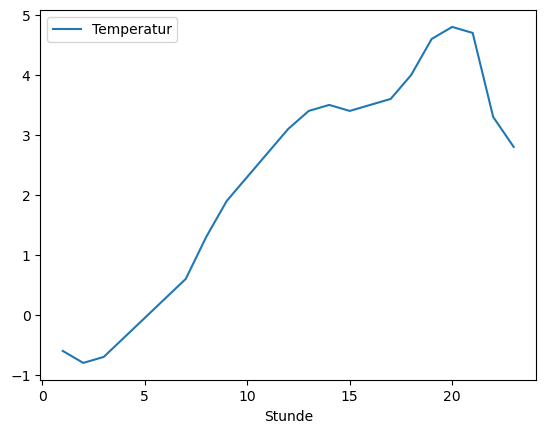

In [158]:
wetter_linear.plot()

<Axes: xlabel='Stunde'>

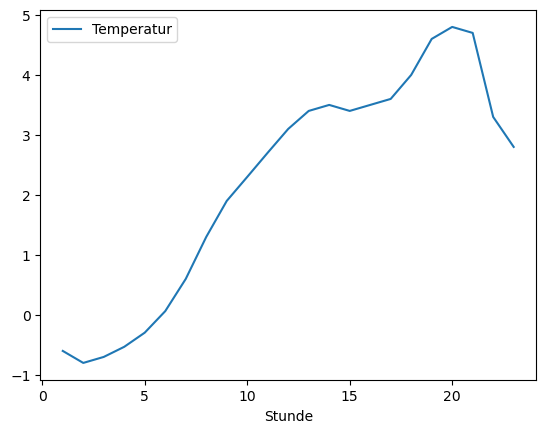

In [159]:
wetter.interpolate(method='polynomial', order=3).plot()